###  Initial Insights from the Dataset
- #### Dataset has different features regarding employee
- #### The aim is to predict the attrition of Employee
- #### Target is Present - We'll use Supervised Learning Mechanisms
- #### Target is Binary 
        - We'll use Classification Algorithms
        - Also the business wants to know which factor is important to decide attrition 
                - So we try to use Decision Tree for better Explainability

#### Steps
1. Load The Dataset
2. Explore Dataset
    - Check for correlation
    - We are using classification algorithms - outliers are not much a problem,but check for outliers in continuous variables
    - Check for zero variance features and drop if found
    - Check for duplicates
    - Treat Null Values(Drop or Replace)
3. One Hot Encoding
4. Modelling
5. Setup ML Pipelines with StandardScaler
6. Evaluate Performance
7. Predict on Test Data
8. Final Submission
    

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


## Quick EDA

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

### Data has zero Null Values

In [6]:
#Checking for duplicate rows
duplicate = df[df.duplicated()]
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
#CHecking if there is % sign in percentage column
df['PercentSalaryHike'].head()

0    11
1    23
2    15
3    11
4    12
Name: PercentSalaryHike, dtype: int64

In [8]:
#Confirming target data type
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64

In [9]:
#Pandas Profiling
profile = ProfileReport(df)
profile.to_notebook_iframe()

### Checking For Correlations

                               Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.005175  -0.005184  -0.025742          0.016464   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571        

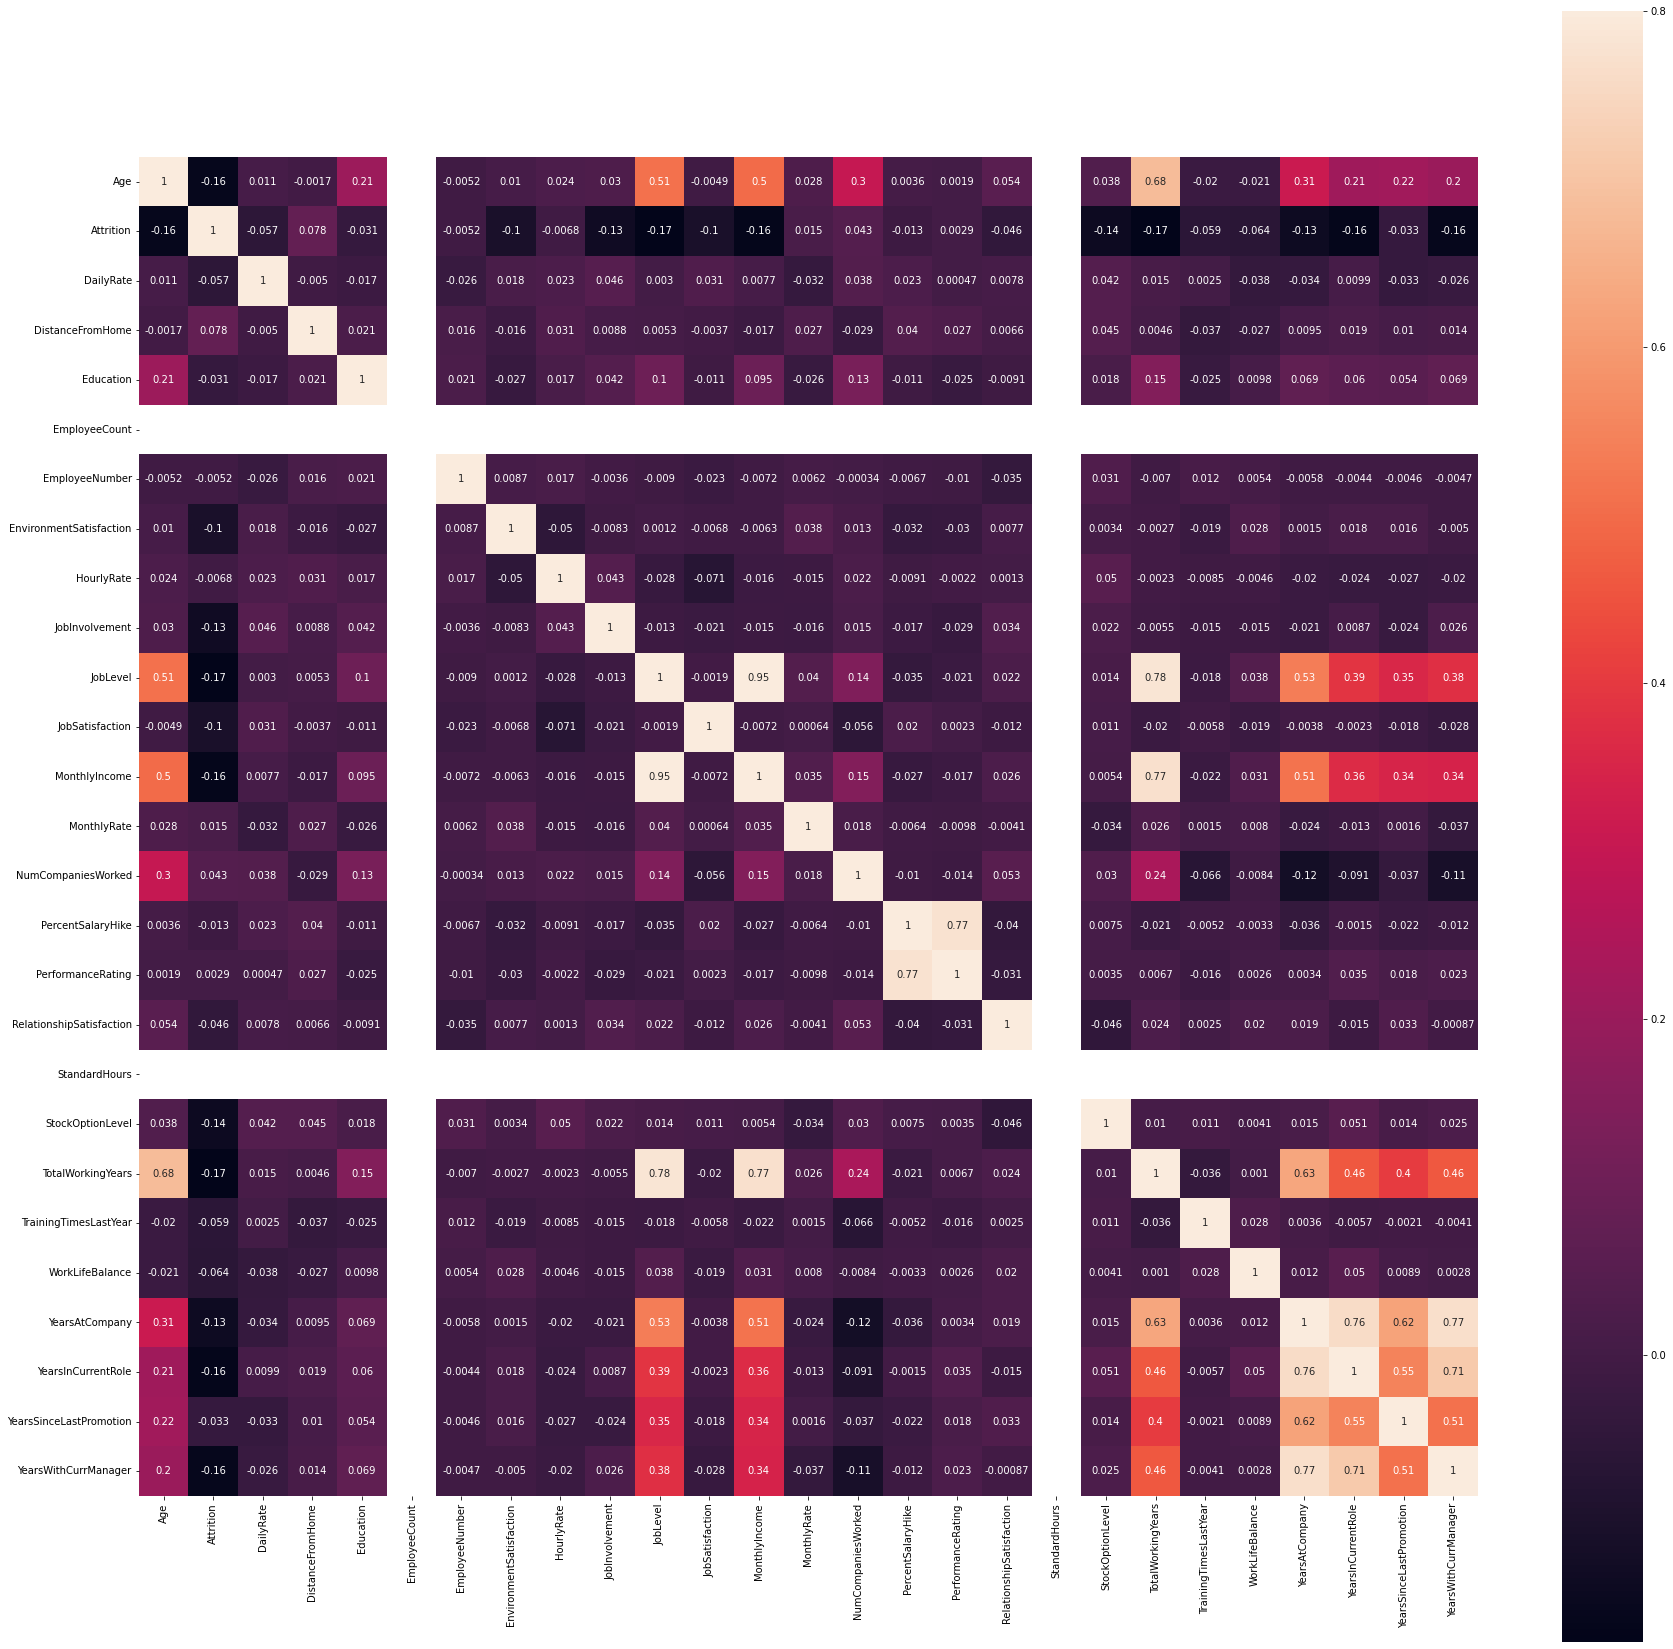

In [10]:
corrmat = df.corr()
print(corrmat)
plt.figure(figsize=(30,30))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [11]:
# Corelated Columns

# TotalWorkingYears - JobLevel        0.78 
# TotalWorkingYears - MonthlyIncome   0.77
# MonthlyIncome     - JobLevel        0.95
# YearsInCurrentRole - YearsAtCompany 0.76
# YearsWithCurrManager-YearsAtCompany 0.77

In [12]:
def preprocessing(df):
    #Dropping Zero variance columns
    df.drop('EmployeeCount',axis=1,inplace=True)
    df.drop('Over18',axis=1,inplace=True)
    df.drop('StandardHours',axis=1,inplace=True)
    #Dropping Non-relevent Columns
    df.drop('EmployeeNumber',axis=1,inplace=True)
    #Dropping Correlated Columns
    df.drop('MonthlyIncome',axis=1,inplace=True)
    df.drop('TotalWorkingYears',axis=1,inplace=True)
    df.drop('YearsInCurrentRole',axis=1,inplace=True)
    df.drop('YearsWithCurrManager',axis=1,inplace=True)
    
    
    
    # return data



    
    

In [13]:
copy_df = df.copy()

In [14]:
copy_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [15]:
preprocessing(copy_df)

In [16]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

## Modelling

- Feature and Target Values - x,y
- One Hot Encode categorical features
- Train Test Split
- Train on Classification Algorithms

In [17]:
copy_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,Yes,11,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,No,23,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,6,Yes,15,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,1,Yes,11,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,9,No,12,3,4,1,3,3,2,2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

In [19]:
#Creating feature and target column
x = copy_df.drop('Attrition',axis=1)
x = pd.get_dummies(x)
#Creating Target Column
y = copy_df['Attrition']

In [20]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,...,0,0,0,0,0,0,1,0,1,0


In [21]:
#Creating Training and Testing Partition
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [22]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
2358,35,1212,8,2,3,78,2,3,4,13755,...,0,0,0,1,0,0,1,0,0,1
618,25,180,2,1,1,65,4,1,1,21632,...,0,0,1,0,0,0,0,1,1,0
406,52,319,3,3,4,39,2,3,3,19609,...,1,0,0,0,0,0,1,0,0,1
1467,27,155,4,3,2,87,4,2,2,5174,...,1,0,0,0,0,0,1,0,0,1
998,26,683,2,1,1,36,2,1,4,4050,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,38,702,1,4,1,59,2,2,4,12930,...,0,0,0,1,0,0,0,1,1,0
1095,33,589,28,4,2,79,3,2,3,22949,...,0,0,0,0,0,0,1,0,0,1
1130,35,750,28,3,2,46,4,2,3,25348,...,0,0,0,0,0,0,1,0,1,0
1294,41,447,5,3,2,85,4,2,2,15530,...,0,0,0,0,0,0,0,1,1,0


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

## Creating Machine Learning Pipelines


In [24]:
pipelines = {
    'rf' : make_pipeline(RandomForestClassifier(random_state=42)),
    'gb' : make_pipeline(GradientBoostingClassifier(random_state=42)),
    # 'dt' : make_pipeline(DecisionTreeClassifier(random_state=42))
}

In [25]:
#Finding n_estimators for random forest using OOB Error Rate


In [26]:
grid={
    'rf':{
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300]
    }
    
}

In [27]:
# Create a blank dict to hold the models
fit_models={}
# Loop through all the algos
for algo,pipeline in pipelines.items():
    print(f'Training the {algo} model')
    # Create new Grid Search CV Classs
    model = GridSearchCV(pipeline, grid[algo], n_jobs=3, cv=10)
    # Train the models
    model.fit(x_train,y_train)
    # Store results inside the dictionary
    fit_models[algo] = model

Training the rf model
Training the gb model


## Individual Predictions

In [28]:
#Random Forest
predict_rf = fit_models['rf'].predict(x_test)

In [29]:
predict_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [30]:
#Gradient Boosting
predict_gb = fit_models['gb'].predict(x_test)

In [31]:
predict_gb

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Evaluate Performance on Test Partition

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
# Evaluate Performance of the Model
for algo, model in fit_models.items():
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    print(f'Metrics for {algo}: accuracy- {accuracy}, recall- {recall}, precision- {precision}')

Metrics for rf: accuracy- 0.9546485260770975, recall- 0.7122302158273381, precision- 1.0
Metrics for gb: accuracy- 0.9569160997732427, recall- 0.7410071942446043, precision- 0.9809523809523809


## Save Best Model

In [34]:
import pickle

In [35]:
with open('Employee_Atttrition_GB.pkl', 'wb') as f: 
  pickle.dump(fit_models['gb'], f)

In [36]:
with open('Employee_Atttrition_GB.pkl', 'rb') as f: 
  reloaded_model = pickle.load(f)

## Area under the curve

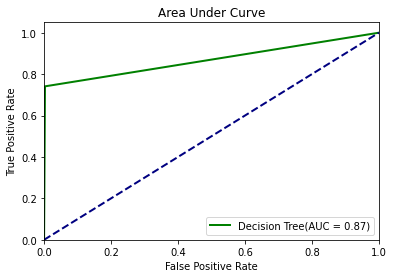

In [41]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, predict_gb)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()